#**Red neuronal para la clasificación de imágenes entre Bart y Homero**

##**Realizado por:**

*   Luis Miguel Ossa - A00369982
*   Keren López Córdoba - A00368902

##**Sobre el dataset**
Son 269 imágenes con las caras y los cuerpos de Homer y Bart, las imágenes ya tienen los nombres, lo que facilita el tratamiento y el entrenamiento de la red neuronal.

![](https://storage.googleapis.com/kaggle-datasets-images/1761725/2876405/e1c4a37080cd7d46e92e2b0d61627a44/dataset-cover.jpg?t=2021-12-02-02-17-49)

##**Importar librerias**

1. **Importación de módulos y bibliotecas**

  Se importan las bibliotecas necesarias, como **google.colab**, **Path** de **pathlib**, **cv2** para procesamiento de imágenes, **numpy** para operaciones numéricas, y **pandas** para manipulación de datos.

2. **División de datos**

  Se utiliza la función **train_test_split** de la biblioteca **sklearn** para dividir los datos en conjuntos de entrenamiento y prueba, una práctica común en la evaluación de modelos.

3. **Flatten de imágenes**

  Se importa **keras** de **tensorflow** para aplanar las imágenes, indicando una posible preparación de datos para modelos de aprendizaje profundo, especialmente redes neuronales convolucionales.

4. **Visualización de datos**

  Se importa **matplotlib.pyplot** para la visualización de datos, sugiriendo que el código puede incluir representación gráfica de resultados, como imágenes o métricas de entrenamiento.

In [4]:
# Importa la funcionalidad de carga de archivos desde Google Colab.
from google.colab import files

# Importa módulos para operaciones y manipulación de datos.
from pathlib import Path  # Para manipulación de rutas de archivos y directorios.
import cv2  # Para procesamiento de imágenes.
import numpy as np  # Para operaciones numéricas.
import pandas as pd  # Para manipulación de datos tabulares.

# Importa la función para dividir datos en conjuntos de entrenamiento y prueba.
from sklearn.model_selection import train_test_split

# Importa la funcionalidad de aplanar imágenes de la biblioteca TensorFlow.
from tensorflow import keras

# Importa la biblioteca para visualización de datos.
import matplotlib.pyplot as plt

##**Importar dataset desde Kaggle**

* Instalar Kaggle en Google Colab proporciona acceso directo a una amplia variedad de conjuntos de datos disponibles.

* Kaggle es una comunidad en línea que alberga competiciones de ciencia de datos y proporciona conjuntos de datos públicos.

* Esta facilita la implementación de modelos de aprendizaje automático y análisis de datos utilizando conjuntos de datos relevantes y desafíos específicos que están disponibles en Kaggle.

In [ ]:
# Instala el paquete 'kaggle' silenciosamente utilizando el comando '!pip install'.
# El prefijo '!' indica que el comando se ejecutará como una instrucción de sistema en lugar de código Python directo.
! pip install -q kaggle

In [ ]:
# Solicita al usuario cargar archivos en un entorno de Google Colab.
# La función 'files.upload()' proporciona una interfaz interactiva que permite seleccionar y cargar archivos desde el sistema local al entorno de Colab.
files.upload()

In [ ]:
# Crea un nuevo directorio llamado '.kaggle' en el directorio raíz del usuario.
# Este directorio suele utilizarse para almacenar las credenciales de Kaggle y otros archivos de configuración relacionados con Kaggle.
! mkdir ~/.kaggleDir

In [ ]:
# Copia el archivo 'kaggle.json' al directorio '.kaggle/' en el directorio raíz del usuario.
# Este tipo de acción es común para configurar las credenciales de Kaggle en Google Colab.
! cp kaggle.json ~/.kaggleDir/

In [ ]:
# Establece permisos de lectura y escritura exclusivos para el propietario del archivo 'kaggle.json' en el directorio '.kaggle/'.
# Los permisos '600' aseguran que solo el propietario tenga permisos de lectura y escritura, garantizando la seguridad de las credenciales de Kaggle.
!chmod 600 ~/.kaggleDir/kaggle.json

In [ ]:
# Lista los conjuntos de datos disponibles en Kaggle.
! kaggle datasets list

In [ ]:
# Descarga un conjunto de datos específico desde Kaggle.
! kaggle datasets download -d juniorbueno/neural-networks-homer-and-bart-classification

In [1]:
# Monta Google Drive en Colab.
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Crea un directorio 'test_datasets' en Google Drive.
!mkdir '/content/drive/MyDrive/Colab Notebooks/test_datasets'

In [ ]:
# Descomprime el archivo 'neural-networks-homer-and-bart-classification' en el directorio 'test_datasets' en Google Drive.
!unzip neural-networks-homer-and-bart-classification -d '/content/drive/MyDrive/Colab Notebooks/test_datasets'

##**Procesamiento de datos**

In [2]:
# Nuevo tamaño para las imágenes.
width, height = 128, 128

In [5]:
# Inicializa las listas 'classification' y 'images'.
# 'imagesPath' apunta al directorio de imágenes en Google Drive.classification = []
images = []
classification = []
imagesPath = Path('/content/drive/MyDrive/Colab Notebooks/test_datasets/homer_bart_1')

# Se itera sobre los archivos en 'imagesPath' para clasificarlos (1 para 'homer', 0 para 'bart').
for pathImage in imagesPath.iterdir():
    if pathImage.name.startswith('h'):
        classification.append(1)
    else:
        classification.append(0)

    # Lee, redimensiona y agrega las imágenes a la lista 'images'.
    image = cv2.imread(str(pathImage))
    image = cv2.resize(image, (width, height))
    images.append(image)


In [6]:
print(classification)
print(images)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
 

In [7]:
#Convertir las listas de clasificación e imagenes en arreglos de numpy.
classification_array = np.array(classification)
images_array = np.array(images)

In [8]:
#Escalar el arreglo de imágenes para que todos sus valores queden entre 0 y 1.
images_array = images_array / 255

images_array[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

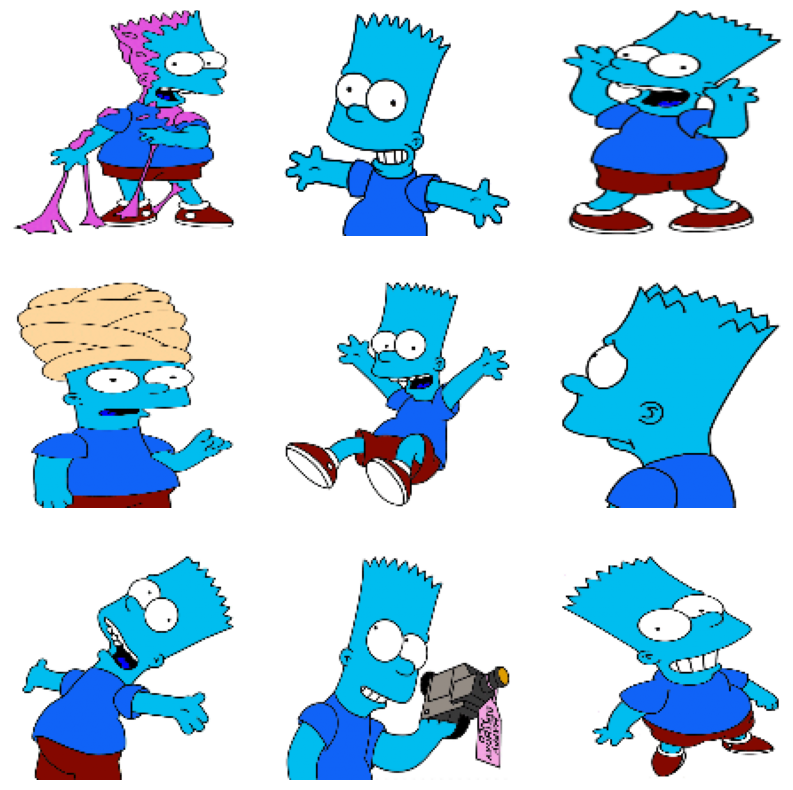

In [9]:
# Crea un gráfico de 3x3 para visualizar las primeras 9 imágenes en 'images_array'.
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images_array[i])
    plt.axis(False)

In [10]:
# Divide los conjuntos de datos en entrenamiento y prueba utilizando 'train_test_split'.
X_train, X_test, y_train, y_test = train_test_split(images_array, classification_array, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(215, 128, 128, 3)

In [12]:
X_test.shape

(54, 128, 128, 3)

In [13]:
y_train.shape

(215,)

In [14]:
y_test.shape

(54,)

In [15]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)
X_train_flatten = X_train.reshape(X_train.shape[1]*X_train.shape[2]*X_train.shape[3],X_train.shape[0])
X_test_flatten = X_test.reshape(X_test.shape[1]*X_test.shape[2]*X_test.shape[3],X_test.shape[0])

X_train_flatten = X_train_flatten.astype('float32')/255
X_test_flatten = X_test_flatten.astype('float32')/255

y_train = y_train.reshape(1,-1)
y_test = y_test.reshape(1,-1)
### END CODE HERE ###

print ("X_train_flatten shape: " + str(X_train_flatten.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test_flatten shape: " + str(X_test_flatten.shape))
print ("y_test shape: " + str(y_test.shape))
print ("sanity check after reshaping: " + str(X_test_flatten[0:5,0]))

X_train_flatten shape: (49152, 215)
y_train shape: (1, 215)
X_test_flatten shape: (49152, 54)
y_test shape: (1, 54)
sanity check after reshaping: [0.00392157 0.00392157 0.00392157 0.00392157 0.00392157]


In [16]:
# Configura la secuencia de aumentación de datos (para hacer crecer el dataset) utilizando capas de preprocesamiento de TensorFlow.
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
    keras.layers.experimental.preprocessing.RandomFlip("horizontal")
])

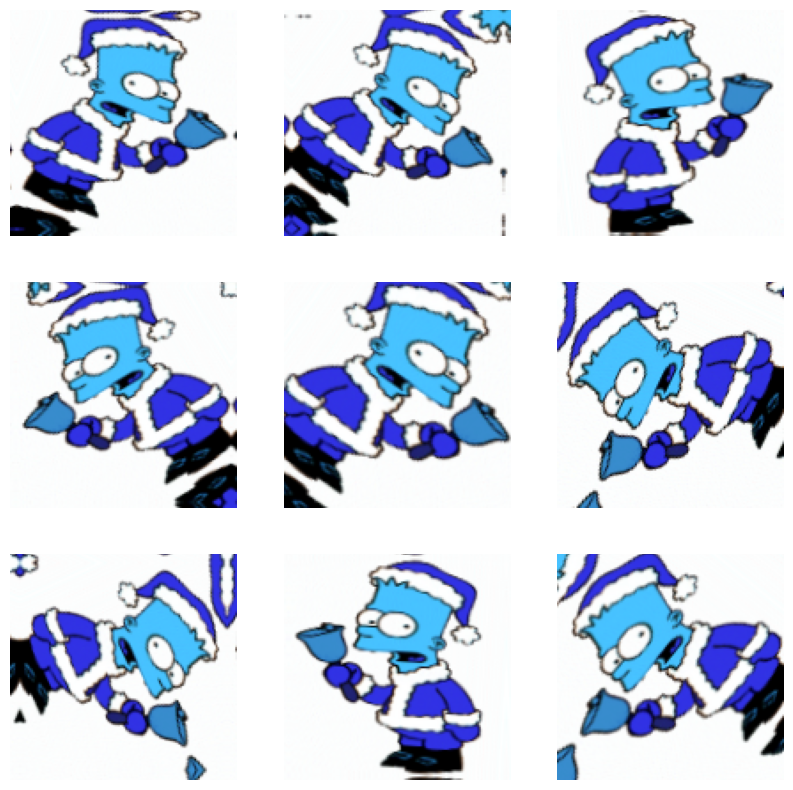

In [17]:
# Crea un gráfico de 3x3 para visualizar las primeras 9 imágenes aumentadas con la secuencia 'data_augmentation'.
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    data_augmented = data_augmentation(X_train[0])
    plt.imshow(data_augmented)
    plt.axis(False)

#**Creación de la red neuronal desde cero**
Los principales pasos para construirla son:
1. Definir la estructura del modelo (por ejemplo, el número de características de entrada).
2. Inicializar los parámetros del modelo
3. Realizar en bucle:
    - El cálculo de la pérdida actual (forward propagation)
    - El cálculo del gradiente actual (backward propagation)
    - La actualización de los parámetros (gradient descent)

A menudo se construyen 1-3 por separado y se integran en una función llamada `model()`

###**Creación de la función sigmoide: una función de ayuda**
 $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$

In [18]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+np.exp(-z))
    ### END CODE HERE ###

    return s

###**Inicialización de parámetros**
Ahora, crearemos una función que genere un vector de ceros de forma (dim, 1) para w e inicialice b a 0.

In [19]:
def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros((dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))

    return w, b

###**Forward y Backward propagation**
Ya que nuestros parámentros están inicializados, podemos hacer los pasos de propagación "hacia adelante" y "hacia atrás" para aprenderlos. Implementaremos una función que vaya calculando el coste y su respectivo gradiente, las fórmulas que usaremos serán:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [20]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b

    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    A = sigmoid(np.dot(w.T,X) + b)              # compute activation
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost
    ### END CODE HERE ###

    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

###**Optimización**
Crearemos una función cuyo objetivo sea aprender w y b, minimizando la función de coste $J$ (algoritmo de gradient descent). Para un parámetro $\theta$, la regla de actualización es $ \theta = \theta - \alpha \text{ } d\theta$ , donde $\alpha$ es la tasa de aprendizaje.

In [21]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """

    costs = []

    for i in range(num_iterations):


        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ###
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        ### END CODE HERE ###

        # Record the costs
        if i % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs

Si bien con la función anterior obtuvimos los valores aprendidos w y b. Podemos usarlos para predecir las etiquetas de un conjunto de datos X. La siguiente función tendra en cuenta dos pasos para calcular las predicciones:

1. Calcular $\hat{Y} = A = \sigma(w^T X + b)$

2. Convertir las entradas de a en 0 (if activation <= 0.5) o 1 (if activation > 0.5), para después almacenar las predicciones en un vector `Y_prediction`.

In [22]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''

    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)           # Dimentions = (1, m)
    ### END CODE HERE ###

    #### WORKING SOLUTION 1: USING IF ELSE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #if (A[0,i] >= 0.5):
        #    Y_prediction[0, i] = 1
        #else:
        #    Y_prediction[0, i] = 0
        ### END CODE HERE ###

    #### WORKING SOLUTION 2: ONE LINE ####
    #for i in range(A.shape[1]):
        ## Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        #Y_prediction[0, i] = 1 if A[0,i] >=0.5 else 0
        ### END CODE HERE ###

    #### WORKING SOLUTION 3: VECTORISED IMPLEMENTATION ####
    Y_prediction = (A >= 0.5) * 1.0

    assert(Y_prediction.shape == (1, m))

    return Y_prediction

###**Fusionar todas las funciones en un modelo**
Por último, solo nos queda armar la estructura del modelo global juntando todos los bloques de construcción (funciones implementadas en las partes anteriores), en el orden correcto.

In [24]:
def model(X_train_, Y_train_, X_test_, Y_test_, num_iterations, learning_rate, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train_ -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train_ -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test_ -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test_ -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """

    ### START CODE HERE ###

    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train_.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train_, Y_train_, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test_)
    Y_prediction_train = predict(w, b, X_train_)
    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train_)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test_)) * 100))


    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train,
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}

    return d

In [28]:
# Ejecutar el modelo
d = model(X_train_flatten, y_train, X_test_flatten, y_test, num_iterations = 5000, learning_rate = 0.01, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.682730
Cost after iteration 200: 0.677676
Cost after iteration 300: 0.675200
Cost after iteration 400: 0.673968
Cost after iteration 500: 0.673340
Cost after iteration 600: 0.673007
Cost after iteration 700: 0.672819
Cost after iteration 800: 0.672701
Cost after iteration 900: 0.672618
Cost after iteration 1000: 0.672553
Cost after iteration 1100: 0.672497
Cost after iteration 1200: 0.672445
Cost after iteration 1300: 0.672395
Cost after iteration 1400: 0.672346
Cost after iteration 1500: 0.672298
Cost after iteration 1600: 0.672250
Cost after iteration 1700: 0.672203
Cost after iteration 1800: 0.672156
Cost after iteration 1900: 0.672108
Cost after iteration 2000: 0.672061
Cost after iteration 2100: 0.672015
Cost after iteration 2200: 0.671968
Cost after iteration 2300: 0.671921
Cost after iteration 2400: 0.671875
Cost after iteration 2500: 0.671828
Cost after iteration 2600: 0.671782
Cost after iteration 2700: 0.671736
Cost

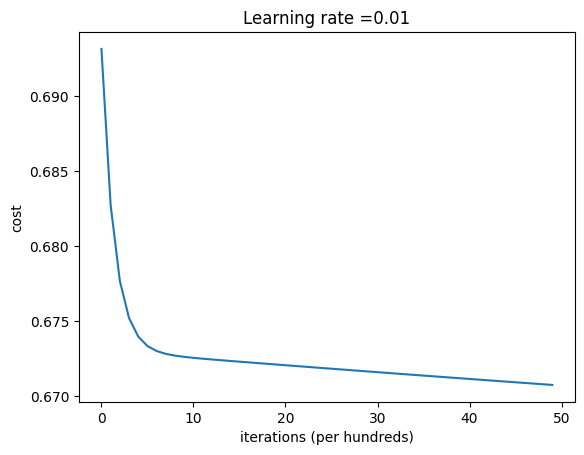

In [29]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

###**Elección de la tasa de aprendizaje**
Para que el gradient descent funcione se debe elegir bien la tasa de aprendizaje. La tasa de aprendizaje $\alpha$ determina la rapidez con la que actualizamos los parámetros. Si la tasa de aprendizaje es demasiado grande podemos "sobrepasar" el valor óptimo. Del mismo modo, si es demasiado pequeña necesitaremos demasiadas iteraciones para converger a los mejores valores. Por eso es crucial utilizar una tasa de aprendizaje bien ajustada.

A continuación, comparemos la curva de aprendizaje de nuestro modelo con varias opciones de tasas de aprendizaje.

learning rate is: 0.001
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.02
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.002
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.0002
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.04
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.004
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------

learning rate is: 0.0004
train accuracy: 60.0 %
test accuracy: 57.407407407407405 %

-------------------------------------------------------



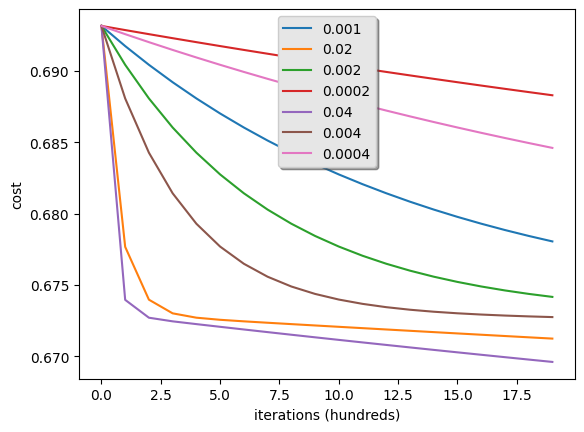

In [32]:
learning_rates = [0.001, 0.02, 0.002, 0.0002, 0.04, 0.004, 0.0004]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(X_train_flatten, y_train, X_test_flatten, y_test, num_iterations = 2000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

**Conclusiones:**

*   Tras una evaluación con distintas tasas de aprendizaje, nos dimos cuenta que el accurracy de entrenamiento y de test no variaron con respecto al número de iteraciones.
*   Al graficar las distintas tasas de aprendizaje las que mejor comportamiento presentan son 0.01, 0.02 y 0.04. En este caso se decidió trabajar con 0.01 ya que no hay una gran diferencia entre ellas.
*   El incremento o decremento en el número de iteraciones entre las 2000 y 5000 no aportó en la mejora de costos.

###**Prueba del modelo con una imagen**

Probaremos la efectividad de nuestra red neuronal con una imagen de bart para obtener su predicción.

<ipython-input-18-8b07e4f9c5bb>:13: RuntimeWarning: overflow encountered in exp
  s = 1/(1+np.exp(-z))


[[0.]]
y = 0.0, your algorithm predicts a "bart" picture.


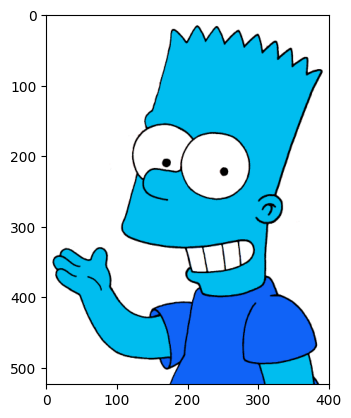

In [42]:
import cv2

# read image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test_datasets/homer_bart_1/bart40.bmp', cv2.IMREAD_UNCHANGED)

# get dimensions of image
dimensions = img
# We preprocess the image to fit your algorithm.
resizedImage = cv2.resize(img, (128, 128))

my_image = resizedImage.reshape((1, 128 * 128 * 3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
print(my_predicted_image)
plt.imshow(img)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + str("homer" if (classification_array[int (np.squeeze(my_predicted_image))]) else "bart") +  "\" picture.")

##**Modelado de la red neuronal usando la librería de Tensorflow**

La función keras.Sequential de TensorFlow se utiliza para construir modelos de redes neuronales secuenciales, donde las capas se apilan una encima de la otra en orden. Los parámetros de la función son las capas que se agregarán al modelo y demás atributos que se explican a continuación:

* **Capas:** Los argumentos pasados a keras.Sequential son las capas que se incluirán en el modelo. Cada capa se especifica como un elemento en la lista. En el ejemplo proporcionado, las capas incluidas son:

  * **Capas de agrupación máxima (MaxPooling2D):** Realizan el submuestreo de las características extraídas por las capas convolucionales.

  * **Capas completamente conectadas (Dense):** Capas de neuronas totalmente conectadas.
  * **Capas convolucionales (Conv2D):** Realizan operaciones de convolución en las imágenes.

* **data_augmentation:** Una secuencia de aumentación de datos definida previamente.

* **input_shape:** En la primera capa Conv2D, se especifica input_shape=(128, 128, 3), indicando que las imágenes de entrada son de tamaño 128x128 píxeles con 3 canales de color (RGB).

* **activation:** Se especifica la función de activación para las capas convolucionales y completamente conectadas. En este caso, se utiliza "relu" para las capas convolucionales y la primera capa completamente conectada, y "sigmoid" en la última capa para la clasificación binaria.

* **kernel_size:** Indica el tamaño de la ventana de convolución.

* **strides:** Especifica el paso utilizado durante la convolución.

* **padding:** Controla el relleno aplicado a las imágenes durante la convolución.

In [34]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(200,input_shape=(128, 128, 3),activation="relu",kernel_size=3,strides=2,padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(400,activation="relu",kernel_size=3,strides=2,padding="same"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(800,activation="relu",kernel_size=3,strides=2,padding="same"),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

##**Compilación del modelo (model.compile):**

* **loss="binary_crossentropy":** La función de pérdida utilizada para problemas de clasificación binaria. Mide la discrepancia entre las predicciones y las etiquetas reales.
* **metrics=["accuracy"]:** Evalúa el rendimiento del modelo utilizando la métrica de precisión durante el entrenamiento y la evaluación.

* **optimizer=keras.optimizers.Adam(learning_rate=0.01):** Utiliza el optimizador Adam con una tasa de aprendizaje de 0.01 para ajustar los pesos del modelo durante el entrenamiento.

##**Parada temprana (keras.callbacks.EarlyStopping):**

* **patience=10:** Detiene el entrenamiento si la métrica no mejora durante 15 épocas consecutivas. La parada temprana ayuda a prevenir el sobreajuste y a mejorar la eficiencia del entrenamiento deteniéndolo antes si no se observa mejora.

In [35]:
# Configura el modelo para el entrenamiento.
model.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=keras.optimizers.Adam(learning_rate=0.01))
# Establece la parada temprana durante el entrenamiento.
early_stop = keras.callbacks.EarlyStopping(patience=25)

* Se realiza el entrenamiento del modelo utilizando el conjunto de entrenamiento (X_train y y_train).

* La métrica de rendimiento se evalúa en el conjunto de prueba (X_test y y_test).

* El entrenamiento se realiza durante un máximo de 40 épocas, pero la parada temprana definida por early_stop puede detener el entrenamiento antes si no se observa mejora en la métrica de validación después de un cierto número de épocas.

* El historial del entrenamiento se almacena en la variable history para su posterior análisis y visualización.

In [37]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
print ("y_train shape: " + str(y_train.shape))
print ("y_test shape: " + str(y_test.shape))

y_train shape: (215, 1)
y_test shape: (54, 1)


In [38]:
# Entrena el modelo utilizando el conjunto de entrenamiento (X_train, y_train).
history = model.fit(X_train,y_train,validation_data=(X_test, y_test),epochs=40,callbacks=early_stop)

Epoch 1/40
7/7 [==============================] - 18s 2s/step - loss: 129.2604 - accuracy: 0.5302 - val_loss: 1.5646 - val_accuracy: 0.5741
Epoch 2/40
7/7 [==============================] - 12s 2s/step - loss: 0.7840 - accuracy: 0.6000 - val_loss: 0.6897 - val_accuracy: 0.5741
Epoch 3/40
7/7 [==============================] - 12s 2s/step - loss: 0.6286 - accuracy: 0.6000 - val_loss: 0.5909 - val_accuracy: 0.5741
Epoch 4/40
7/7 [==============================] - 12s 2s/step - loss: 0.5482 - accuracy: 0.6000 - val_loss: 0.4798 - val_accuracy: 0.5741
Epoch 5/40
7/7 [==============================] - 11s 2s/step - loss: 0.5108 - accuracy: 0.6651 - val_loss: 0.4571 - val_accuracy: 0.8148
Epoch 6/40
7/7 [==============================] - 11s 1s/step - loss: 0.5136 - accuracy: 0.6884 - val_loss: 0.4570 - val_accuracy: 0.7593
Epoch 7/40
7/7 [==============================] - 12s 2s/step - loss: 0.5093 - accuracy: 0.7163 - val_loss: 1.0452 - val_accuracy: 0.7593
Epoch 8/40
7/7 [================

##**Gráficas**

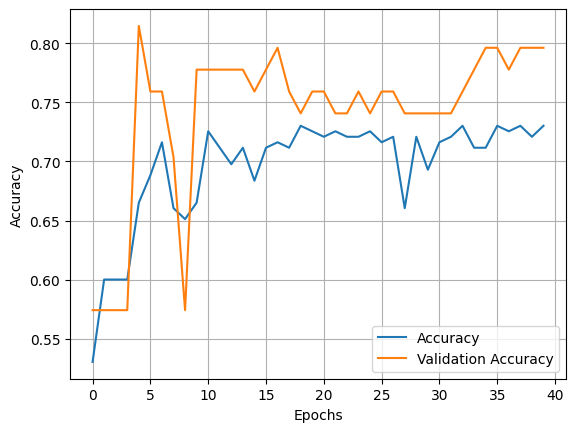

In [43]:
# Grafica las curvas de precisión (accuracy) y precisión de validación (val_accuracy) a lo largo de las épocas.
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

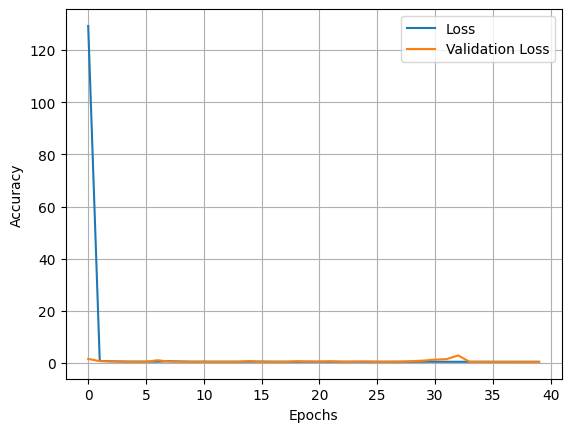

In [44]:
# Grafica las curvas de pérdida (loss) y pérdida de validación (val_loss) a lo largo de las épocas.
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

##**Predicciones**
* Se realizan predicciones utilizando el modelo entrenado sobre el conjunto de prueba (X_test).

* Luego, convierte las predicciones continuas en etiquetas binarias utilizando un umbral de 0.5. Si la predicción es mayor o igual a 0.5, se asigna el valor 1, de lo contrario, se asigna el valor 0.

* Las predicciones resultantes se almacenan en la lista prediction_label.

In [ ]:
prediction = model.predict(X_test)
prediction_label = []
for i in prediction:
    i = int(i)
    if i >= 0.5:
        prediction_label.append(i)
    else:
        prediction_label.append(i)

prediction = model.predict(X_test)
prediction_label = []
for score in prediction:
    score = float(score)  # Ensure the score is treated as a float
    if score >= 0.5:
        prediction_label.append(1)  # Append 1 for scores greater than or equal to 0.5
    else:
        prediction_label.append(0)  # Append 0 for scores less than 0.5


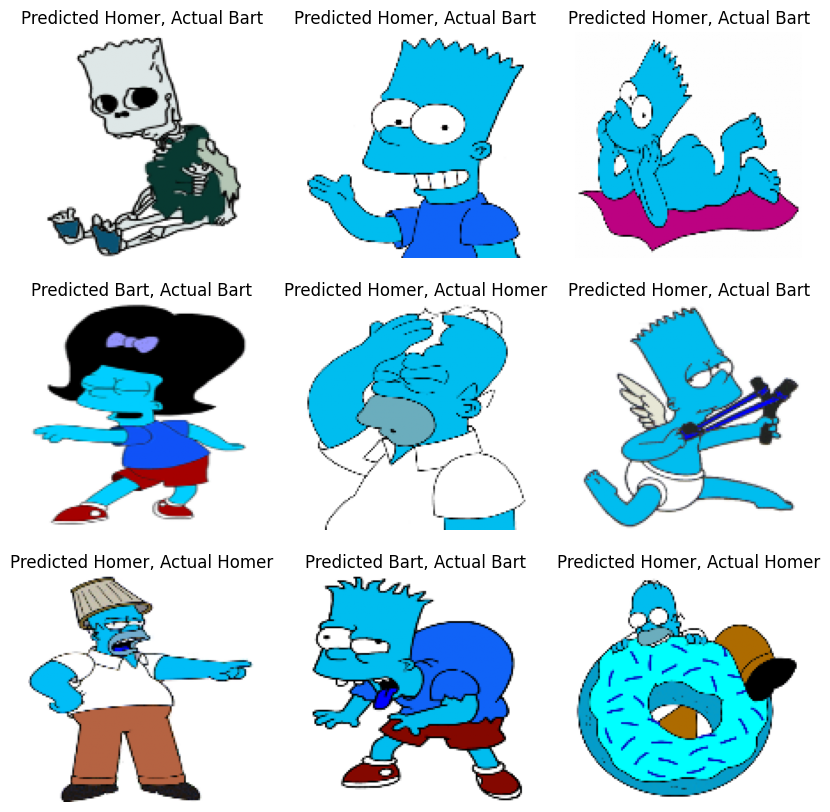

In [46]:
# Define las etiquetas de clase para la visualización.
class_names = ["Bart", "Homer"]

# Crea un gráfico de 3x3 para visualizar las primeras 9 imágenes del conjunto de prueba y sus predicciones.
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i])
    plt.title(f"Predicted {class_names[prediction_label[i]]}, Actual {class_names[y_test[i][0]]}")
    plt.axis(False)